# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import nltk
import re
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
fake = pd.read_csv(r'D:\Excel files\Fake and real news dataset\Fake.csv').sample(5000,random_state=10)
real = pd.read_csv(r'D:\Excel files\Fake and real news dataset\True.csv').sample(5000,random_state=10)

In [46]:
fake.shape

(5000, 4)

In [45]:
real.shape

(5000, 4)

In [35]:
fake.head(2)

,title,text,subject,date
1854,Bill O’Reilly’s Show Bizarrely Cut Short In W...,The New York Times recently published a bombsh...,News,"April 7, 2017"
1752,Trump Just Shamed Our Country Yet AGAIN With ...,Donald Trump has made a fine art of p*ssing of...,News,"April 18, 2017"


In [36]:
fake['subject'].value_counts()

News               1927
politics           1415
left-news           970
Government News     310
Middle-east         194
US_News             184
Name: subject, dtype: int64

In [37]:
real.head(2)

,title,text,subject,date
15143,"EU and Iran defend nuclear deal, under fire fr...","SAMARKAND, Uzbekistan (Reuters) - Senior offic...",worldnews,"November 10, 2017"
4911,Proposed cuts to State Dept. budget worry Hous...,WASHINGTON (Reuters) - The Republican head of ...,politicsNews,"March 16, 2017"


In [38]:
real['subject'].value_counts()

politicsNews    2646
worldnews       2354
Name: subject, dtype: int64

In [39]:
df.shape

(9999, 5)

In [42]:
### Word Cloud of Fake News

text = " ".join(fake['text'].tolist())

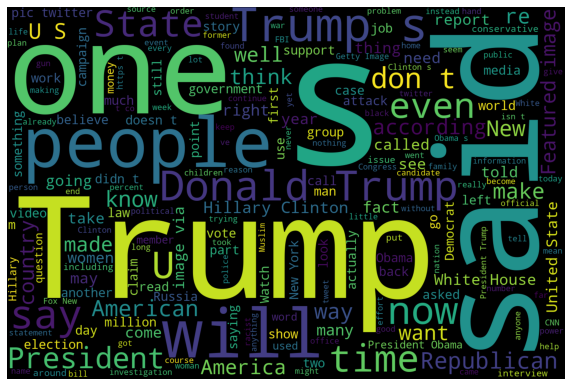

In [43]:
plt.figure(figsize=(10,20))
wordcloud = WordCloud(width=1500,height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

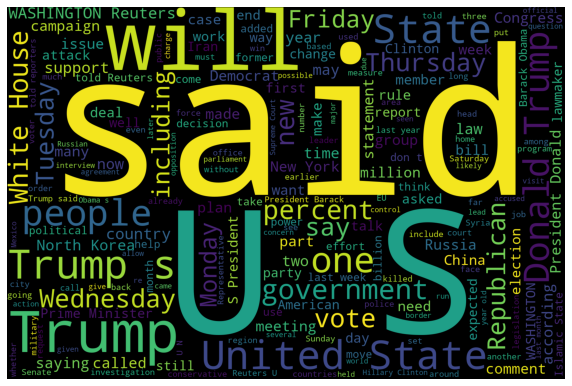

In [44]:
### Word Cloud of Real News

text = " ".join(real['text'].tolist())

plt.figure(figsize=(10,20))
wordcloud = WordCloud(width=1800,height=1200).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

# Cleaning Data

- Removing Reuters or Twitter info from data

In [47]:
real.sample(5)

,title,text,subject,date
20060,Turkish police fire tear gas at protesters out...,ANKARA (Reuters) - Turkish police fired tear g...,worldnews,"September 14, 2017"
15590,"Trump, Japan's Abe toast 'bromance' as two-day...",TOKYO (Reuters) - Every American president has...,worldnews,"November 6, 2017"
14318,Panama illegal drug seizures set to hit record...,PANAMA CITY (Reuters) - Panama is on track to ...,worldnews,"November 21, 2017"
645,Republican Senator Paul to seek Senate tax pla...,WASHINGTON (Reuters) - Republican U.S. Senator...,politicsNews,"November 14, 2017"
13694,Colombia's congress approves peace tribunals f...,BOGOTA (Reuters) - Colombia s lower house of c...,worldnews,"November 28, 2017"


In [53]:
unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split('-',maxsplit = 1)
        record[1]
        assert(len(record[0])<120)  ## if char is less than 120 than it's tweet
    except:
        unknown_publishers.append(index)

len(unknown_publishers)

45

In [54]:
record[0]

'ANKARA/BAGHDAD (Reuters) '

In [55]:
real.iloc[unknown_publishers].text

838       (This version of the Nov. 2 story corrects pa...
27       The following statements were posted to the ve...
1509     The following statements were posted to the ve...
2442     The following statements were posted to the ve...
5784     Federal appeals court judge Neil Gorsuch, the ...
453      The following statements were posted to the ve...
19376     (Corrects Sept. 21 story to remove reference ...
1711     The following statements were posted to the ve...
7        The following statements were posted to the ve...
9737     Caitlyn Jenner posted a video on Wednesday (Ap...
2383     The following statements were posted to the ve...
2922     The following statements were posted to the ve...
1824     The following statements were posted to the ve...
1657      ((This Sept. 19 story corrects paragraph 9 to...
6026     The following bullet points are from the U.S. ...
1381     The following statements were posted to the ve...
308      The following statements were posted to the ve.

In [50]:
real = real.drop(8970,axis=0)

In [56]:
publisher = []
temp_text = []

for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        temp_text.append(row)
        publisher.append('Unknown')
    else:
        record = row.split('-',maxsplit=1)
        publisher.append(record[0].strip())
        temp_text.append(record[1].strip())

In [57]:
real['publisher'] = publisher
real['text'] = temp_text

In [58]:
real.head()

,title,text,subject,date,publisher
15143,"EU and Iran defend nuclear deal, under fire fr...",Senior officials from the European Union and I...,worldnews,"November 10, 2017","SAMARKAND, Uzbekistan (Reuters)"
4911,Proposed cuts to State Dept. budget worry Hous...,The Republican head of the Foreign Affairs Com...,politicsNews,"March 16, 2017",WASHINGTON (Reuters)
3738,U.S. cyber bill would shift power away from sp...,A bill proposed in Congress on Wednesday would...,politicsNews,"May 17, 2017",WASHINGTON (Reuters)
2966,Two faces of Maine politics show rifts in stat...,Maine’s two most prominent Republicans grabbed...,politicsNews,"June 29, 2017",(Reuters)
4804,Exclusive: Tillerson plans to skip NATO meetin...,U.S. Secretary of State Rex Tillerson plans to...,politicsNews,"March 21, 2017",WASHINGTON (Reuters)


In [ ]:
## cleaning fake data

In [59]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [60]:
fake.iloc[empty_fake_index]

,title,text,subject,date
12422,COMEDY GOLD! LOCAL TV NEWS Traffic Reporter Sh...,,politics,"Nov 12, 2016"
12474,UNDERCOVER JOURNALIST In Burka Is Offered Huma...,,politics,"Nov 7, 2016"
12603,TRUMP LAUNCHES GRENADE AT TAX AND SPEND WASHIN...,,politics,"Oct 27, 2016"
13008,HILLARY TAKES CREDIT For The Arab Spring Disas...,,politics,"Sep 15, 2016"
18882,SHOCKER: Public School Turns Computer Lab Into...,,left-news,"Apr 1, 2017"
...,...,...,...,...
19424,LIBERAL LOSER Screams “This is my America!” Af...,,left-news,"Dec 19, 2016"
19428,COLLEGE STUDENTS ASKED TO SIGN A Petition Canc...,,left-news,"Dec 18, 2016"
12413,JUDGE JEANINE PIRRO: “This wasn’t an election…...,,politics,"Nov 13, 2016"
12825,FUNNY! MSNBC ANCHOR ASKS Millennial Women If T...,,politics,"Oct 5, 2016"


In [62]:
fake['text'] = fake['title'] + " " + fake['text']
real['text'] = real['title'] + " " + real['text']

In [63]:
fake.iloc[empty_fake_index]

,title,text,subject,date
12422,COMEDY GOLD! LOCAL TV NEWS Traffic Reporter Sh...,COMEDY GOLD! LOCAL TV NEWS Traffic Reporter Sh...,politics,"Nov 12, 2016"
12474,UNDERCOVER JOURNALIST In Burka Is Offered Huma...,UNDERCOVER JOURNALIST In Burka Is Offered Huma...,politics,"Nov 7, 2016"
12603,TRUMP LAUNCHES GRENADE AT TAX AND SPEND WASHIN...,TRUMP LAUNCHES GRENADE AT TAX AND SPEND WASHIN...,politics,"Oct 27, 2016"
13008,HILLARY TAKES CREDIT For The Arab Spring Disas...,HILLARY TAKES CREDIT For The Arab Spring Disas...,politics,"Sep 15, 2016"
18882,SHOCKER: Public School Turns Computer Lab Into...,SHOCKER: Public School Turns Computer Lab Into...,left-news,"Apr 1, 2017"
...,...,...,...,...
19424,LIBERAL LOSER Screams “This is my America!” Af...,LIBERAL LOSER Screams “This is my America!” Af...,left-news,"Dec 19, 2016"
19428,COLLEGE STUDENTS ASKED TO SIGN A Petition Canc...,COLLEGE STUDENTS ASKED TO SIGN A Petition Canc...,left-news,"Dec 18, 2016"
12413,JUDGE JEANINE PIRRO: “This wasn’t an election…...,JUDGE JEANINE PIRRO: “This wasn’t an election…...,politics,"Nov 13, 2016"
12825,FUNNY! MSNBC ANCHOR ASKS Millennial Women If T...,FUNNY! MSNBC ANCHOR ASKS Millennial Women If T...,politics,"Oct 5, 2016"


In [64]:
### Lowercasing the text

real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# Preprocessing the text

In [65]:
real['class'] = 1
fake['class'] = 0

In [66]:
real = real[['text','class']]
fake = fake[['text','class']]

In [68]:
df = real.append(fake,ignore_index=True)

In [69]:
df

,text,class
0,"eu and iran defend nuclear deal, under fire fr...",1
1,proposed cuts to state dept. budget worry hous...,1
2,u.s. cyber bill would shift power away from sp...,1
3,two faces of maine politics show rifts in stat...,1
4,exclusive: tillerson plans to skip nato meetin...,1
...,...,...
9994,tillerson slams biden comment: ‘show me your r...,0
9995,colin kaepernick’s mother fires back at trump...,0
9996,"trump just visited his home state, and new yo...",0
9997,80-year-old man guns down 81-year-old over ch...,0


In [73]:
import string

In [74]:
def clean_text(text:str):
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    return text

In [75]:
# clean text
df['text'] = df['text'].apply(clean_text)

# Model Building

### Vectorization-Word2vec

In [76]:
import gensim

In [77]:
y = df['class'].values

In [78]:
X = [d.split() for d in df['text'].tolist()]

In [83]:
type(X[0])

list

In [82]:
print(X[0])

['eu', 'and', 'iran', 'defend', 'nuclear', 'deal', 'under', 'fire', 'from', 'trump', 'senior', 'officials', 'from', 'the', 'european', 'union', 'and', 'iran', 'spoke', 'up', 'on', 'friday', 'in', 'defense', 'of', 'the', 'agreement', 'limiting', 'tehran', 's', 'nuclear', 'program', 'as', 'the', 'pact', 'comes', 'under', 'heavy', 'pressure', 'from', 'u', 's', 'president', 'donald', 'trump', 'the', 'nuclear', 'deal', 'was', 'a', 'major', 'achievement', 'of', 'european', 'and', 'international', 'multilateral', 'diplomacy', 'eu', 'foreign', 'policy', 'chief', 'federica', 'mogherini', 'told', 'a', 'conference', 'in', 'uzbekistan', 'the', 'european', 'union', 'will', 'make', 'sure', 'it', 'will', 'continue', 'to', 'be', 'fully', 'implemented', 'by', 'all', 'in', 'all', 'its', 'parts', 'she', 'said', 'trump', 'on', 'oct', '13', 'dealt', 'a', 'blow', 'to', 'the', 'pact', 'by', 'refusing', 'to', 'certify', 'that', 'tehran', 'was', 'complying', 'with', 'the', 'accord', 'under', 'which', 'iran', '

In [86]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X,vector_size=DIM,window=10,min_count=1)

In [89]:
len(w2v_model.wv.index_to_key)

72199

In [93]:
w2v_model.wv.most_similar('us')

[('our', 0.5550150275230408),
 ('syria', 0.5392966270446777),
 ('nato', 0.4963304400444031),
 ('dialogue', 0.49237123131752014),
 ('assad', 0.482709139585495),
 ('country', 0.4741913378238678),
 ('militarily', 0.4720611870288849),
 ('ourselves', 0.4691389203071594),
 ('solution', 0.46809425950050354),
 ('europe', 0.46474602818489075)]

In [94]:
w2v_model.wv.most_similar('hate')

[('hateful', 0.8183460831642151),
 ('bigotry', 0.7958943247795105),
 ('racist', 0.7523089051246643),
 ('hatred', 0.7403964996337891),
 ('racism', 0.7095153331756592),
 ('everywhere', 0.6857913732528687),
 ('fear', 0.6756927967071533),
 ('hating', 0.6709002256393433),
 ('xenophobic', 0.6552555561065674),
 ('radical', 0.6548397541046143)]

In [95]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [96]:
X = tokenizer.texts_to_sequences(X)

In [99]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 's': 7,
 'that': 8,
 'on': 9,
 'for': 10,
 'is': 11,
 'said': 12,
 'trump': 13,
 'he': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'by': 19,
 'his': 20,
 'has': 21,
 'be': 22,
 'not': 23,
 'have': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'u': 32,
 'but': 33,
 'president': 34,
 'would': 35,
 'i': 36,
 'we': 37,
 'about': 38,
 'will': 39,
 't': 40,
 'their': 41,
 'had': 42,
 'you': 43,
 'been': 44,
 '”': 45,
 'or': 46,
 'more': 47,
 'people': 48,
 'after': 49,
 'were': 50,
 'which': 51,
 'one': 52,
 'she': 53,
 'if': 54,
 'her': 55,
 'out': 56,
 'all': 57,
 'state': 58,
 'what': 59,
 'up': 60,
 'new': 61,
 'its': 62,
 'when': 63,
 'also': 64,
 'house': 65,
 'over': 66,
 'no': 67,
 'there': 68,
 'clinton': 69,
 'government': 70,
 'donald': 71,
 'so': 72,
 'states': 73,
 'obama': 74,
 'republican': 75,
 'our': 76,
 'can': 77,
 'him': 78,
 'some': 79,
 'than': 80,
 'year': 

In [104]:
len(X)

9999

In [100]:
[len(x) for x in X]

[407,
 116,
 441,
 745,
 786,
 452,
 1198,
 274,
 409,
 622,
 722,
 232,
 921,
 736,
 81,
 283,
 536,
 1563,
 430,
 529,
 73,
 382,
 370,
 131,
 94,
 996,
 538,
 383,
 265,
 386,
 92,
 1107,
 324,
 127,
 57,
 79,
 1101,
 702,
 219,
 1110,
 84,
 448,
 53,
 423,
 132,
 483,
 439,
 280,
 290,
 75,
 82,
 210,
 975,
 643,
 151,
 115,
 75,
 460,
 360,
 151,
 649,
 488,
 836,
 414,
 711,
 340,
 311,
 269,
 601,
 417,
 70,
 82,
 473,
 116,
 342,
 334,
 264,
 82,
 421,
 76,
 295,
 90,
 56,
 312,
 579,
 324,
 856,
 425,
 736,
 430,
 112,
 439,
 784,
 246,
 859,
 415,
 246,
 303,
 269,
 407,
 107,
 70,
 796,
 312,
 522,
 308,
 299,
 566,
 94,
 279,
 102,
 408,
 483,
 353,
 591,
 107,
 394,
 326,
 297,
 377,
 821,
 138,
 99,
 242,
 179,
 466,
 427,
 56,
 364,
 393,
 376,
 343,
 416,
 287,
 221,
 329,
 302,
 275,
 1018,
 102,
 394,
 93,
 406,
 633,
 72,
 843,
 114,
 67,
 66,
 711,
 886,
 382,
 728,
 362,
 89,
 184,
 611,
 572,
 413,
 205,
 572,
 335,
 994,
 438,
 447,
 277,
 137,
 180,
 162,
 118,


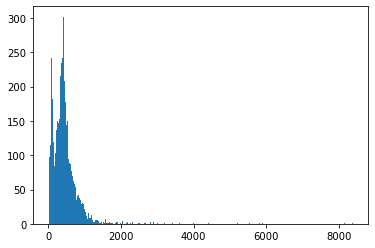

In [103]:
plt.hist([len(x) for x in X],bins=700)
plt.show();

In [105]:
### News more than 1000 words

nos = np.array([len(x) for x in X])
len(nos[nos>1000])

382

In [107]:
maxlen = 1000
X = pad_sequences(X,maxlen=maxlen)

In [108]:
vocab_size = len(tokenizer.word_index) + 1 ## add 1 for unknown words

In [109]:
vocab = tokenizer.word_index

In [112]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size,DIM))
    
    for word,i in vocab.items():
        weight_matrix[i] = model.wv[word]
        
    return weight_matrix

In [113]:
embedding_vectors = get_weight_matrix(w2v_model)

In [114]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights = [embedding_vectors],input_length = maxlen , trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [115]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         7220000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 7,337,377
Trainable params: 117,377
Non-trainable params: 7,220,000
_________________________________________________________________


In [116]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=10)

In [118]:
model.fit(x_train,y_train,validation_split=0.3,epochs=2)

Epoch 1/2
165/165 [==============================] - 237s 1s/step - loss: 0.1156 - acc: 0.9630 - val_loss: 0.1056 - val_acc: 0.9609
Epoch 2/2
165/165 [==============================] - 237s 1s/step - loss: 0.0876 - acc: 0.9733 - val_loss: 0.0744 - val_acc: 0.9733


In [120]:
y_pred = (model.predict(x_test)>=0.5).astype(int)
accuracy_test = accuracy_score(y_test,y_pred)
accuracy_test

79/79 [==============================] - 32s 399ms/step


0.9724

# Predictive System

In [150]:
df.head(10)

,text,class
0,eu and iran defend nuclear deal under fire fr...,1
1,proposed cuts to state dept budget worry hous...,1
2,u s cyber bill would shift power away from sp...,1
3,two faces of maine politics show rifts in stat...,1
4,exclusive tillerson plans to skip nato meetin...,1
5,philippine leader says no way he ll do deal ...,1
6,pakistan army pushed political role for milita...,1
7,u s lawmakers ask wells about taking back bon...,1
8,canada says most border crossing asylum seeker...,1
9,michael bloomberg may launch independent u s ...,1


In [155]:
df.iloc[5]['text']

'philippine leader says  no way  he ll do deal with islamist rebels philippine president rodrigo duterte on saturday ruled out the possibility of allowing islamic state linked militants to flee a southern city in exchange for the release of dozens of hostages  the militants seized large parts of marawi city on the island of mindanao in may  and a hardcore of fighters has held out through more than 100 days of air strikes and ground attacks  by troops   no way   duterte told reporters when asked about a rumor that one rebel leader  omarkhayam maute  had proposed releasing hostages in exchange for the safe exit of the militants  pockets of fighters remain in the ruins of the heart of a city devastated by artillery and bombings  in an occupation that has alarmed the region about the possibility of islamic state  on the back foot in iraq and syria  making a new home in the southern philippines   the military has launched its final push to retake marawi  and is coming under heavy fire from 

In [151]:
def predict_newstype(x:str):
    x = tokenizer.texts_to_sequences([x])
    x = pad_sequences(x,maxlen=maxlen)
    y_pred = (model.predict(x)>=0.5).astype(int)
    if y_pred==0:
        print('The news is fake')
    else:
        print('The news is real')

In [158]:
predict_newstype('philippine leader says  no way  he ll do deal with islamist rebels philippine president rodrigo duterte on saturday ruled out the possibility of allowing islamic state linked militants to flee a southern city in exchange for the release of dozens of hostages  the militants seized large parts of marawi city on the island of mindanao in may  and a hardcore of fighters has held out through more than 100 days of air strikes and ground attacks  by troops   no way   duterte told reporters when asked about a rumor that one rebel leader  omarkhayam maute  had proposed releasing hostages in exchange for the safe exit of the militants  pockets of fighters remain in the ruins of the heart of a city devastated by artillery and bombings  in an occupation that has alarmed the region about the possibility of islamic state  on the back foot in iraq and syria  making a new home in the southern philippines   the military has launched its final push to retake marawi  and is coming under heavy fire from gunmen as troops try to secure buildings and navigate through mines and booby traps  the military estimates about 20 to 30 hostages are being held  some of whom it says were forced to take up arms against government troops   if i can save one life there  i am willing to wait one year  to retake the city   duterte said of the hostages  after visiting wounded soldiers in cagayan de oro  a few hours away from marawi  martial law has been imposed in mindanao  an island of 22 million people  until the end of the year  to allow the military to break up an alliance of pro islamic state militant groups  on another front  the military is also fighting communist rebels of the new people s army following a breakdown in peace talks with the government  duterte on saturday threatened to expand martial law to other areas of the philippines to crack down on the insurgents  some 655 militants  45 civilians and 145 soldiers and policemen have been killed in marawi  according to the military  which says it has rescued 1 728 civilians  at least 400 000 have been displaced  army spokesman colonal edgard arevalo said saving hostages was the priority of the military s mission   we are still very mindful of the presence of civilians  guns against their heads   who were made human shields or ordered to wield firearms and ammunition  were converted to become fighters and shoot at our troops   he said in a statement  the united states has provided technical support to the philippines military in marawi  visiting manila on friday  australian defence minister marise payne offered a small  detachment of soldiers to provide training to philippine forces')

1/1 [==============================] - 0s 53ms/step
The news is real
